<a href="https://colab.research.google.com/github/IronZiiz/Data-Science_Time-Series/blob/main/Normalization_Time_series_Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cafelura - Sales analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [ ]:
cafelura = pd.read_csv('/content/drive/MyDrive/Alura/Data-Science:Análise-de-Series-temporais/material curso - Time Series/cafelura.csv')

In [ ]:
cafelura.dtypes

,0
mes,object
vendas,int64


In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [ ]:
print('Qnt de linhas e colunas:', cafelura.shape)
print('Qnt de dados nulos:',cafelura.isna().sum().sum())

Qnt de linhas e colunas: (24, 2)
Qnt de dados nulos: 0


In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x =x, y = y, data = dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel('Mês',fontsize = 14)
  ax.set_ylabel('Vendas',fontsize = 14)
  plt.show()

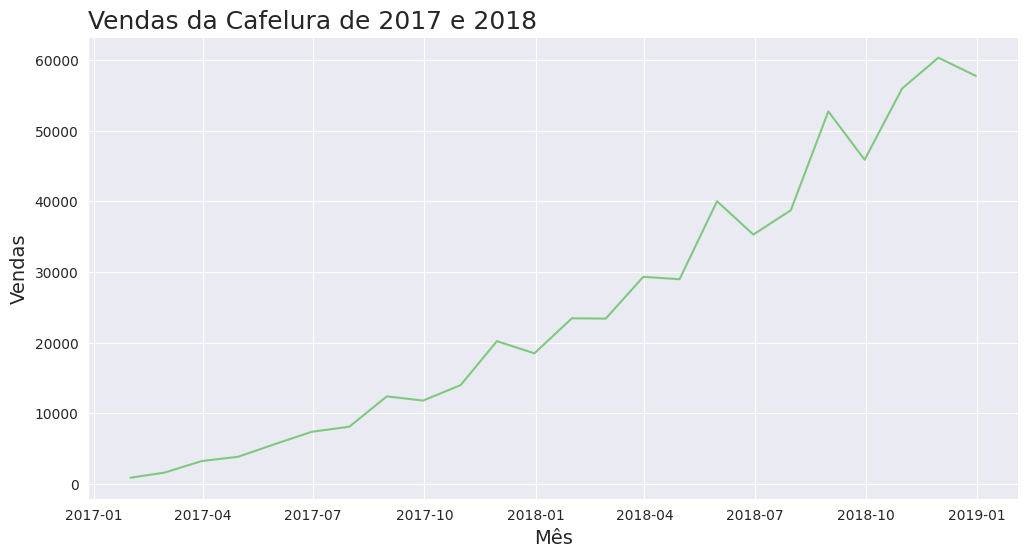

In [ ]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [ ]:
# Normalizando nosso gráfico baseado na quantidade de dias de final de semana

quantidade_de_dias_de_fds = pd.read_csv('/content/drive/MyDrive/Alura/Data-Science:Análise-de-Series-temporais/material curso - Time Series/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
# normalizando com base nos dias de finais de semana
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


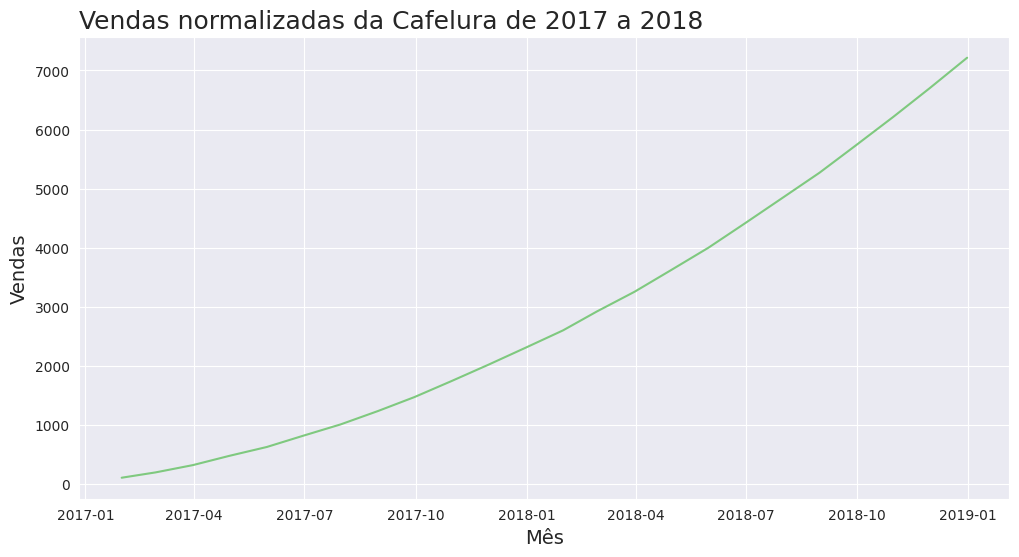

In [ ]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas', 'mes', 'vendas_normalizadas', cafelura)

<Axes: title={'center': 'Vendas Cafelura 2017 e 2018 - Normalizadas'}, xlabel='mes', ylabel='vendas_normalizadas'>

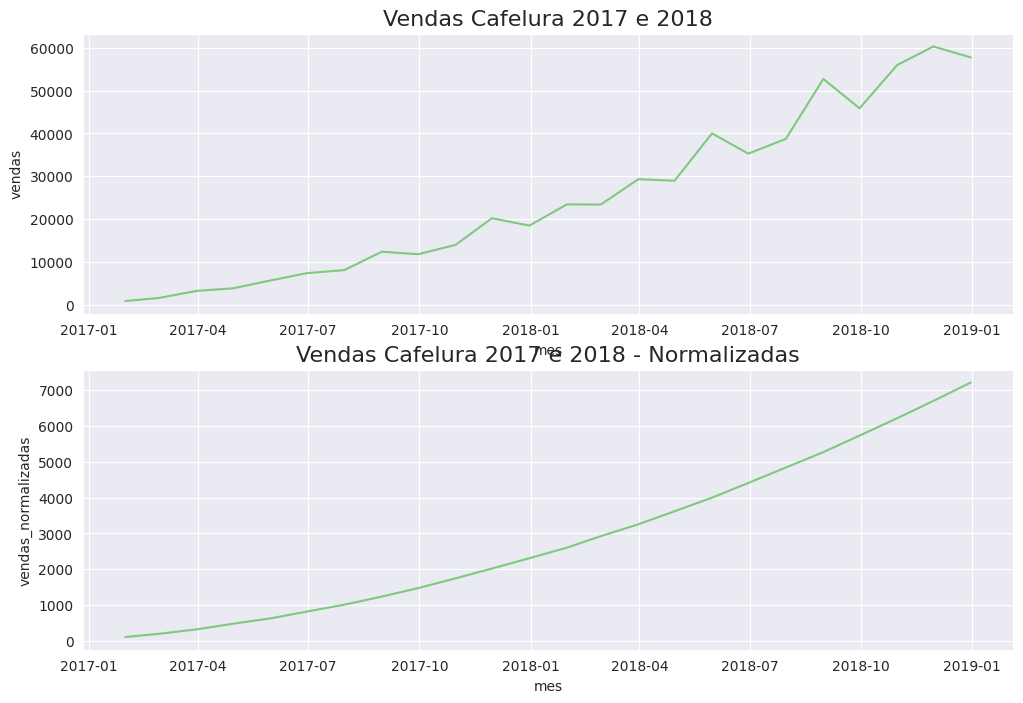

In [ ]:
plt.figure(figsize = (12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 16)
sns.lineplot(x = 'mes', y ='vendas', data = cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Cafelura 2017 e 2018 - Normalizadas', fontsize = 16)
sns.lineplot(x = 'mes', y ='vendas_normalizadas', data = cafelura)

When thinking about time series, trend, seasonality, and noise should always come to mind:

trend

seasonality

noise




## Statsmodel

One way to check these three items at once

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
chocolura = pd.read_csv('/content/drive/MyDrive/Alura/Data-Science:Análise-de-Series-temporais/material curso - Time Series/chocolura.csv')

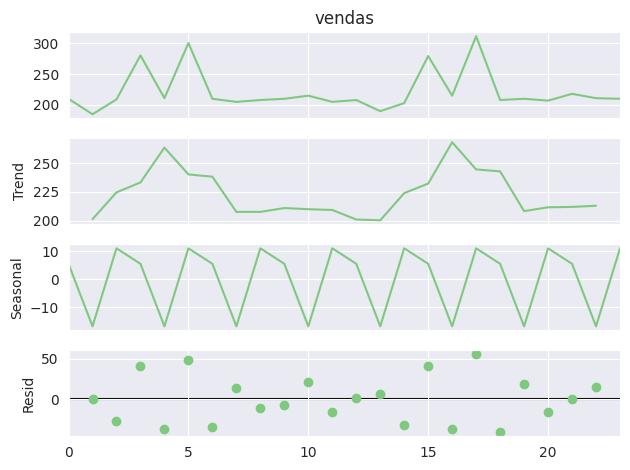

In [ ]:
resultado = seasonal_decompose(chocolura['vendas'], period = 3)
ax = resultado.plot()

In [ ]:
# Exibindo melhor
# Criando um data frame com esses valores
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()


,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16,12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)
  plt.show()

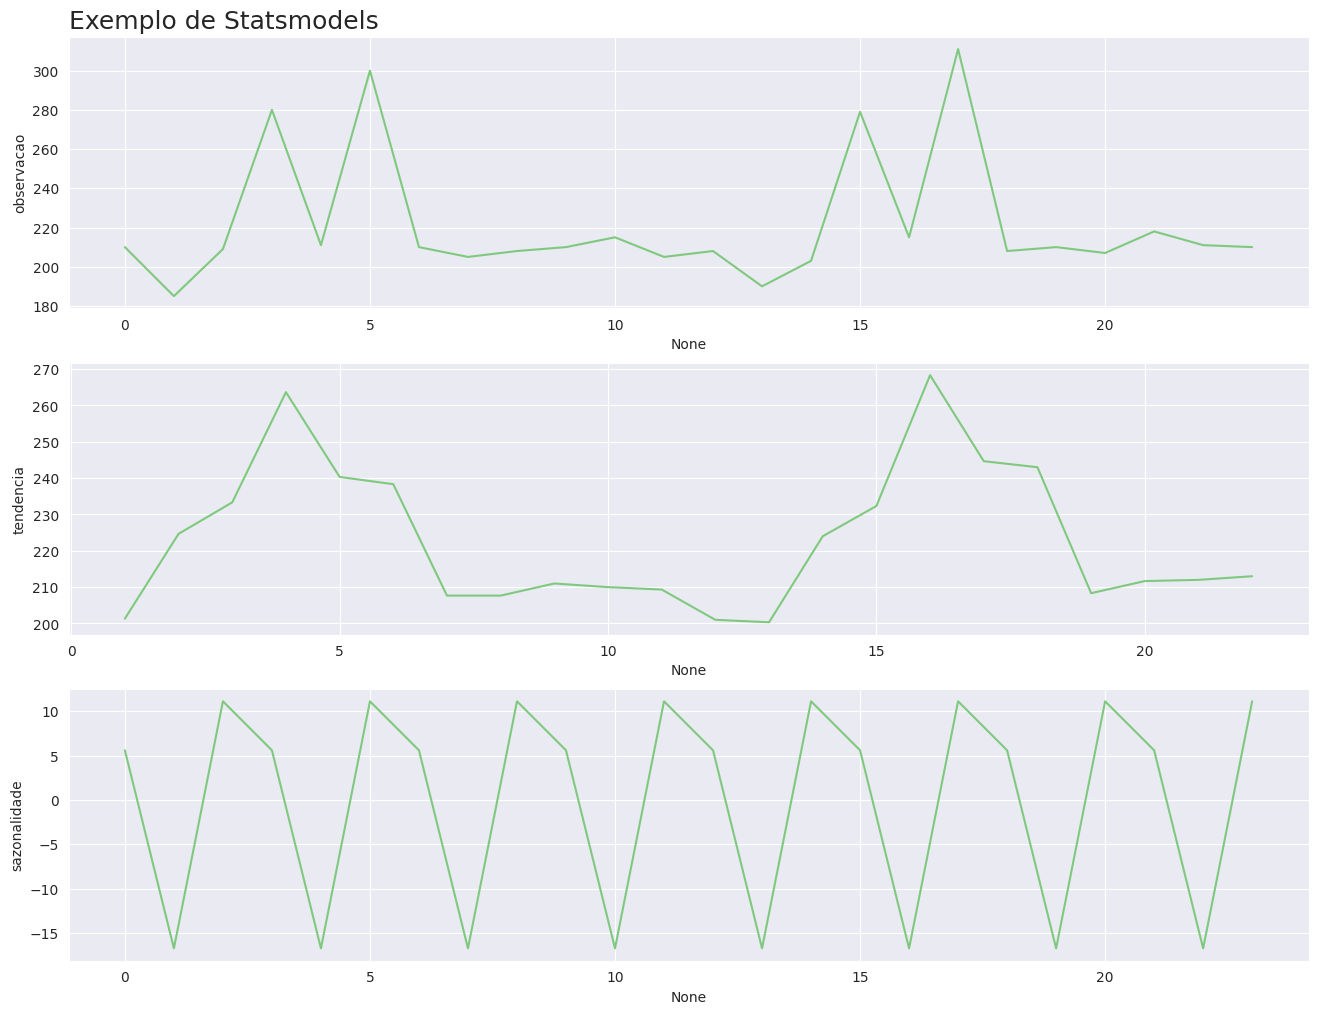

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')